# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
pip install citipy

     -------------------------------------- 675.6/675.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=b287e2b072856c6a471361509f94154dbbd9298177ebbb0d1e0f2f382264bc27
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\49\05\c1\6baa8ceb020ca642133e903591948e0fbe269e9c519aefd95d
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hun
Processing Record 2 of Set 1 | yaren
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | ikwiriri
Processing Record 9 of Set 1 | susuman
Processing Record 10 of Set 1 | weno
Processing Record 11 of Set 1 | qarauyl
Processing Record 12 of Set 1 | brookings
Processing Record 13 of Set 1 | port lincoln
Processing Record 14 of Set 1 | arkhangel'sk
Processing Record 15 of Set 1 | tafresh
Processing Record 16 of Set 1 | castillos
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | biysk
Processing Record 19 of Set 1 | vilyuysk
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | contamana
Processing Record 23 of Set 1 | hawaiian parad

Processing Record 40 of Set 4 | nuuk
Processing Record 41 of Set 4 | crane
Processing Record 42 of Set 4 | palmer
Processing Record 43 of Set 4 | hunstanton
Processing Record 44 of Set 4 | porto velho
Processing Record 45 of Set 4 | bikin
Processing Record 46 of Set 4 | ilulissat
Processing Record 47 of Set 4 | cromwell
Processing Record 48 of Set 4 | buala
Processing Record 49 of Set 4 | port saint john's
Processing Record 0 of Set 5 | portland
Processing Record 1 of Set 5 | pudozh
Processing Record 2 of Set 5 | gadzhiyevo
Processing Record 3 of Set 5 | xilin hot
Processing Record 4 of Set 5 | selfoss
Processing Record 5 of Set 5 | taksimo
Processing Record 6 of Set 5 | copan
Processing Record 7 of Set 5 | nizhnyaya poyma
Processing Record 8 of Set 5 | bardai
Processing Record 9 of Set 5 | pacific grove
Processing Record 10 of Set 5 | pontianak
Processing Record 11 of Set 5 | oriximina
Processing Record 12 of Set 5 | aral
Processing Record 13 of Set 5 | mermoz boabab
Processing Record

Processing Record 35 of Set 8 | flying fish cove
Processing Record 36 of Set 8 | suva
Processing Record 37 of Set 8 | moroni
Processing Record 38 of Set 8 | ulanhot
Processing Record 39 of Set 8 | awjilah
Processing Record 40 of Set 8 | aykhal
Processing Record 41 of Set 8 | muisne
Processing Record 42 of Set 8 | namibe
Processing Record 43 of Set 8 | bo phloi
Processing Record 44 of Set 8 | baker city
Processing Record 45 of Set 8 | mahdia
Processing Record 46 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 47 of Set 8 | bodo
Processing Record 48 of Set 8 | sabang
Processing Record 49 of Set 8 | santa elena de uairen
Processing Record 0 of Set 9 | cill airne
Processing Record 1 of Set 9 | shihezi
Processing Record 2 of Set 9 | yarmolyntsi
Processing Record 3 of Set 9 | wajir
Processing Record 4 of Set 9 | miarinarivo
City not found. Skipping...
Processing Record 5 of Set 9 | kismayo
Processing Record 6 of Set 9 | edeia
Processing Record 7 of Set 9 | usinsk
Processi

Processing Record 24 of Set 12 | tucuma
Processing Record 25 of Set 12 | quesnel
Processing Record 26 of Set 12 | karwar
Processing Record 27 of Set 12 | xuddur
Processing Record 28 of Set 12 | galesong
Processing Record 29 of Set 12 | rockdale
Processing Record 30 of Set 12 | huarmey
Processing Record 31 of Set 12 | jwaneng
Processing Record 32 of Set 12 | puerto rico
Processing Record 33 of Set 12 | gamba
Processing Record 34 of Set 12 | oranjemund
Processing Record 35 of Set 12 | kizel
Processing Record 36 of Set 12 | cedeira
Processing Record 37 of Set 12 | kijang
Processing Record 38 of Set 12 | ancud
Processing Record 39 of Set 12 | aripuana
Processing Record 40 of Set 12 | ungsang-nodongjagu
Processing Record 41 of Set 12 | pizarro
Processing Record 42 of Set 12 | saudarkrokur
Processing Record 43 of Set 12 | fale old settlement
Processing Record 44 of Set 12 | hola
Processing Record 45 of Set 12 | pibor
City not found. Skipping...
Processing Record 46 of Set 12 | la junta
Proce

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hun,29.1268,15.9477,25.13,41,49,5.61,LY,1696537608
1,yaren,-0.5472,166.9160,28.58,70,67,0.79,NR,1696537608
2,grytviken,-54.2811,-36.5092,4.86,94,100,3.02,GS,1696537608
3,bilibino,68.0546,166.4372,-16.14,95,42,1.85,RU,1696537608
4,ushuaia,-54.8000,-68.3000,4.81,81,100,5.66,AR,1696537608


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hun,29.1268,15.9477,25.13,41,49,5.61,LY,1696537608
1,yaren,-0.5472,166.9160,28.58,70,67,0.79,NR,1696537608
2,grytviken,-54.2811,-36.5092,4.86,94,100,3.02,GS,1696537608
3,bilibino,68.0546,166.4372,-16.14,95,42,1.85,RU,1696537608
4,ushuaia,-54.8000,-68.3000,4.81,81,100,5.66,AR,1696537608


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

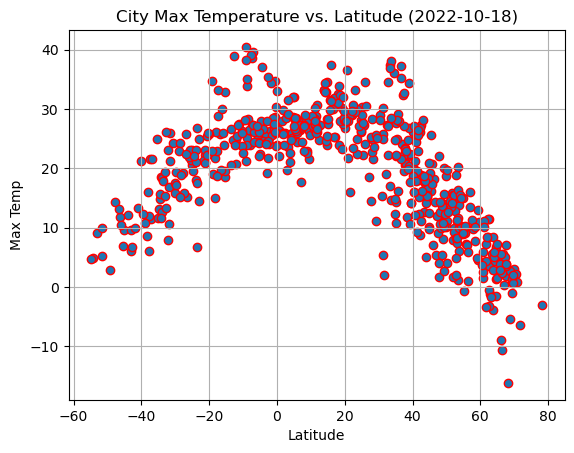

In [45]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
           city_data_df["Max Temp"],edgecolor="red", marker="o", label="cities")

# Incorporate the other graph properties
plt.title("City Max Temperature vs. Latitude (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

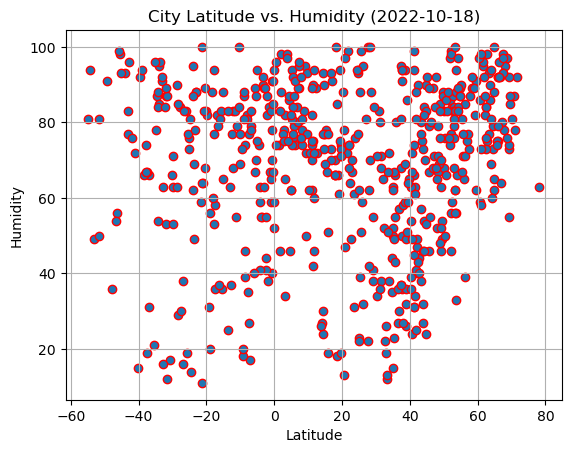

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
           city_data_df["Humidity"],edgecolor="red", marker="o", label="cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

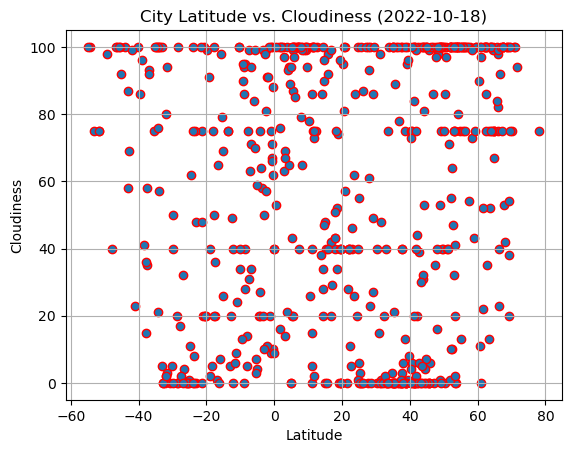

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
           city_data_df["Cloudiness"],edgecolor="red", marker="o", label="cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

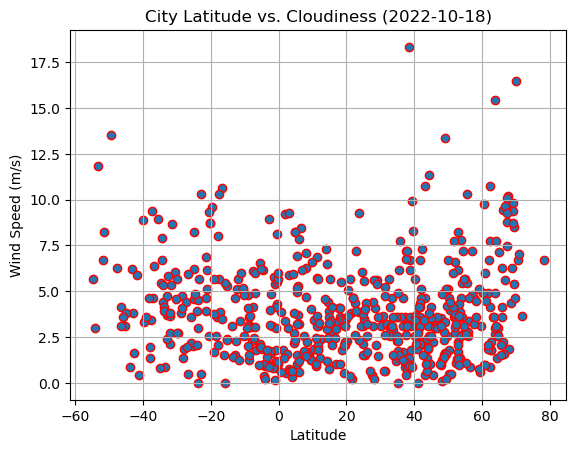

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
           city_data_df["Wind Speed"],edgecolor="red", marker="o", label="cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, text_coordinates):
    
    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hun,29.1268,15.9477,25.13,41,49,5.61,LY,1696537608
3,bilibino,68.0546,166.4372,-16.14,95,42,1.85,RU,1696537608
6,stanley,54.8680,-1.6985,15.03,89,75,5.66,GB,1696537608
8,susuman,62.7833,148.1667,-1.12,75,35,1.79,RU,1696537609
9,weno,7.4515,151.8468,26.97,89,100,2.57,FM,1696537609


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]< 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yaren,-0.5472,166.9160,28.58,70,67,0.79,NR,1696537608
2,grytviken,-54.2811,-36.5092,4.86,94,100,3.02,GS,1696537608
4,ushuaia,-54.8000,-68.3000,4.81,81,100,5.66,AR,1696537608
5,adamstown,-25.0660,-130.1015,20.54,76,1,6.19,PN,1696537608
7,ikwiriri,-7.9562,38.9716,24.00,82,5,2.28,TZ,1696537608


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6613500788695786


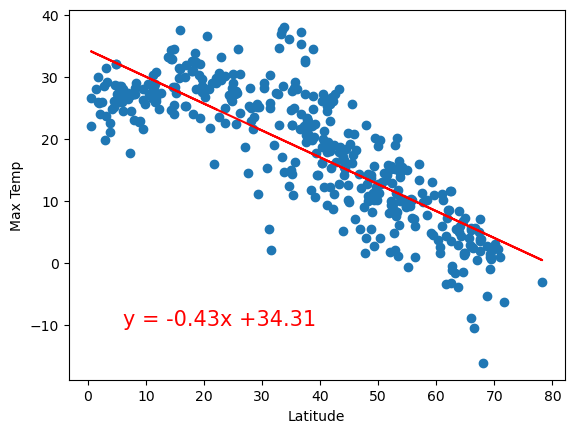

In [37]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, "Max Temp", (6, -10))

The r-value is: 0.59901682223183


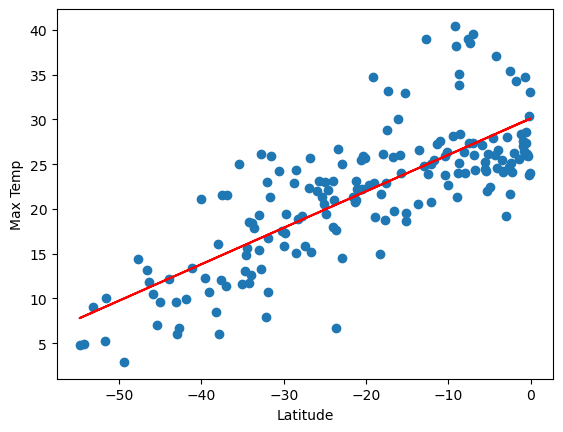

In [29]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, "Max Temp", (6, -10))

**Discussion about the linear relationship:** The 'Temperature vs Latitude' linear regression plots show a strong positive correlation in both the Northern and Southern Hemisphere. In both hemispehers, we can see that the closer the latitude value gets to 0, the higher the temperature, which is an indication that the closer to the equator, the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.010768002493575617


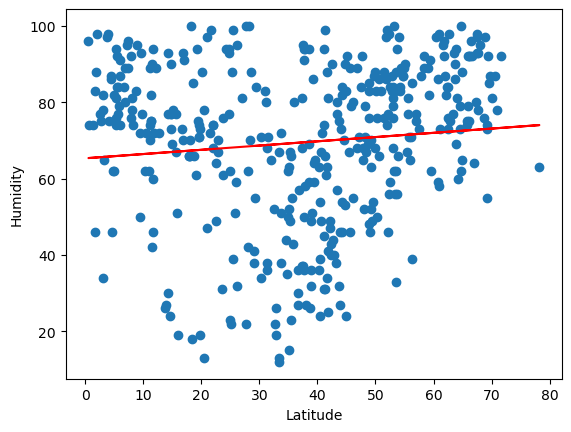

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

linear_regression(x_values, y_values, "Humidity", (6, -10))

The r-value is: 0.0014910434209863715


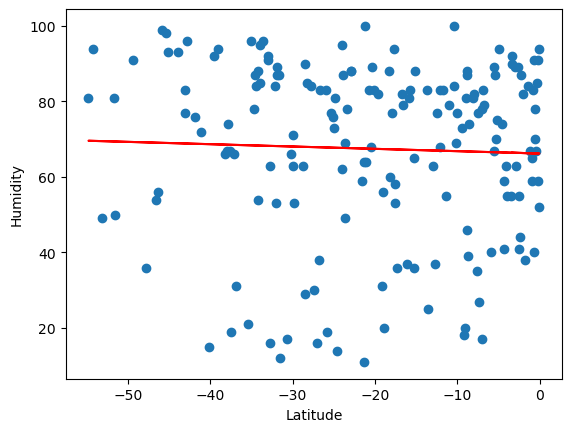

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

linear_regression(x_values, y_values, "Humidity", (6, -10))

**Discussion about the linear relationship:** The 'Humidity vs Latitude' linear regression plots show taht in both the Northern and Southern Hemispheres, there is no signifiant correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.010898679349969107


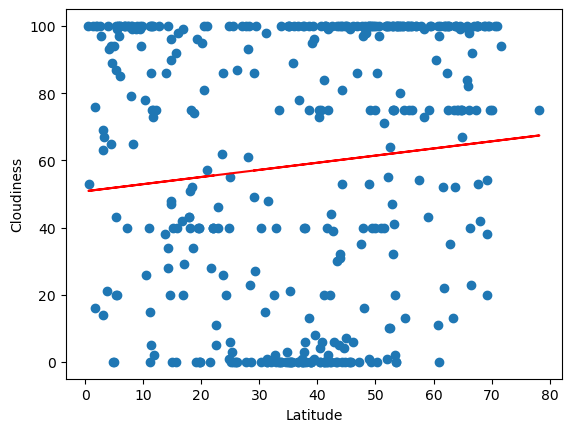

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, "Cloudiness", (6, -10))

The r-value is: 0.014661130053817457


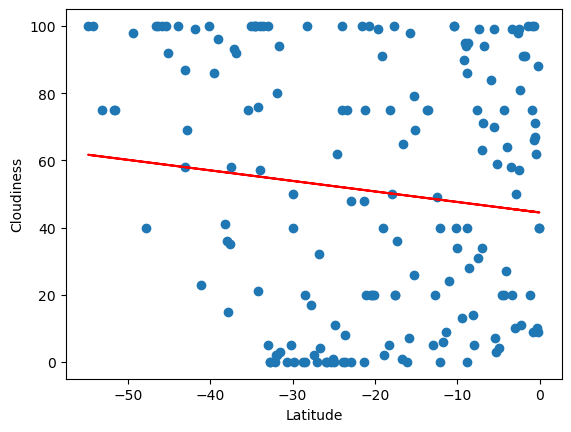

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, "Cloudiness", (6, -10))

**Discussion about the linear relationship:**  The 'Cloudiness vs Latitude' linear regression plots show taht in both the Northern and Southern Hemispheres, there is no signifiant correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.040386986072275935


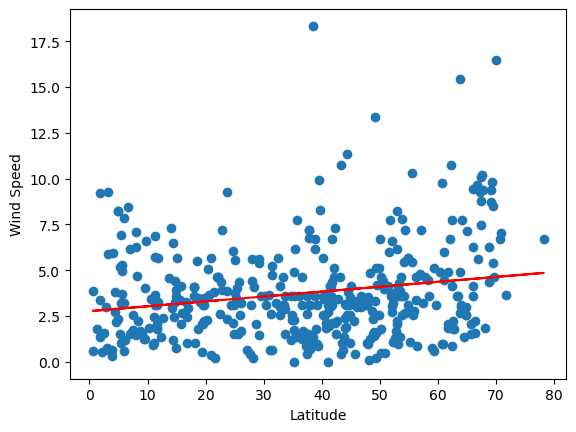

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, "Wind Speed", (6, -10))

The r-value is: 0.06873681168938782


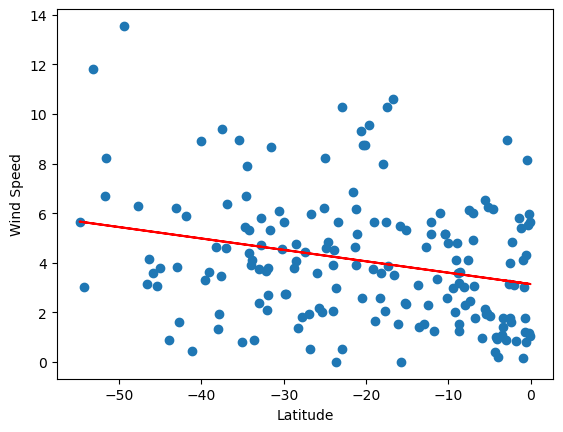

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, "Wind Speed", (6, -10))

**Discussion about the linear relationship:**  The 'Wind Speed vs Latitude' linear regression plots show taht in both the Northern and Southern Hemispheres, there is no signifiant correlation between wind speed and latitude.